### Subtheme Sentiment Analysis

**Subtheme Sentiment Analysis Task
Take the following example:
“One tyre went missing, so there was a delay to get the two tyres fitted. The way garage dealt
with it was fantastic.”**

**In this review there are numerous insights, insights we call “subtheme sentiments”. A Subtheme
sentiment is generally a sentiment towards an aspect or a problem.
If we look at the subtheme sentiments of the above review we will get a clearer sense what these
generally are.
incorrect tyres sent negative garage service positive wait time negative
The main difference between these subthemes is that Garage Service and Wait Time are aspects
of the service that can be positive or negative while
Incorrect Tyres Sent denotes a problem, something inherently negative.**

## Importing Libraries


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

In [2]:
#Load the data 
df = pd.read_csv(r'C:\Users\Admin\Downloads\Evaluation-dataset.csv',header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10128,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10129,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10130,Excellent service from point of order to fitti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def remove_empty(text):
    return [lab for lab in text if lab != '']

def remove_space(text):
    return [lab.strip() for lab in text]

df = df.fillna('')
columns = ['text']
labels = []
for idx in range(1, 15):
    name = 'label_' + str(idx)
    labels.append(name)
    columns.append(name)

df.columns = columns
df['target'] = df[labels].values.tolist()
df['target'] = df['target'].map(remove_empty)
df['target'] = df['target'].map(remove_space)
df =  df[['text','target']]
df["target_counts"] = df["target"].apply(lambda label: len(label))
print("There are {} Rows in Data".format(df.shape[0]))

There are 10132 Rows in Data


In [4]:
df.shape

(10132, 3)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


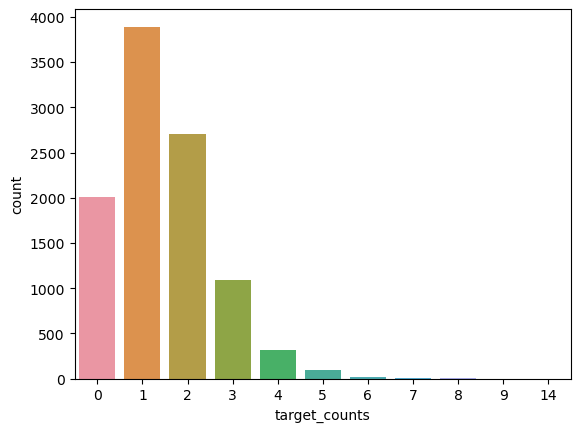

In [5]:
sns.countplot(df.target_counts)
plt.show()

1. As we can see there are around 2000 data points who dont have labels

2. Most of the datapoints have less than or equal to 4 lebels



In [6]:
# Unique lebels
len(df.target.explode().unique())

107

In [7]:
#create the data frame
pd.DataFrame.from_dict(dict(df.target.explode().value_counts()),orient = 'index',columns = ['Count'])

,Count
value for money positive,4780
garage service positive,2031
ease of booking positive,1187
location positive,1063
length of fitting positive,657
...,...
good local fitting services,1
simple to use website,1
Garage was quick & efficient with fitting of tyres,1
only 8 as the garage was unable to fit the tyres in the allotted time and I had to wait over an hour.,1


In [8]:
df

,text,target,target_counts
0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...",2
1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...",2
2,Very easy to use and good value for money.,[value for money positive],1
3,Really easy and convenient to arrange,[ease of booking positive],1
4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...",3
...,...,...,...
10127,"I ordered the wrong tyres, however [REDACTED] ...","[refund positive, delivery punctuality positiv...",3
10128,"Good experience, first time I have used [REDAC...",[length of fitting positive],1
10129,"I ordered the tyre I needed on line, booked a ...","[location positive, delivery punctuality posit...",4
10130,Excellent service from point of order to fitti...,[],0


In [9]:
#
def get_noisy_labels(df):
    noisy_labels = []
    for label,count in Counter(df.target.explode()).items():
        if count < 5:
            if 'positive' not in label.split():
                if 'negative' not in label.split():
                    noisy_labels.append(label)
    return noisy_labels

# to remove nosiy labels from the dataframe
def remove_noisy_labels(df):
    #print("Removing noisy labels...")
    noisy_labels = get_noisy_labels(df)
    print("Number of Noisy Labels - {}".format(len(noisy_labels)))
    for i in range(len(df)):
        for nLabel in noisy_labels:
            if nLabel in df.iloc[i,1]:
                df.iloc[i,1].remove(nLabel)
    
    # to remove datapoints that doesn't have any labels 
    df = df[df["target"].str.len() != 0]

    return df 

df = remove_noisy_labels(df)


Number of Noisy Labels - 44


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


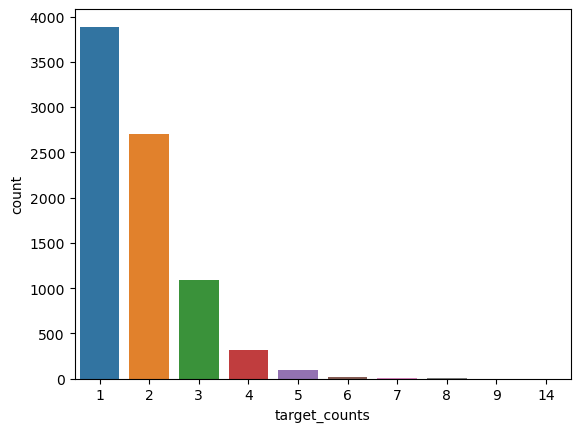

In [10]:
sns.countplot(df.target_counts)
plt.show()

* Here we have removed datapoints who had 0 labels

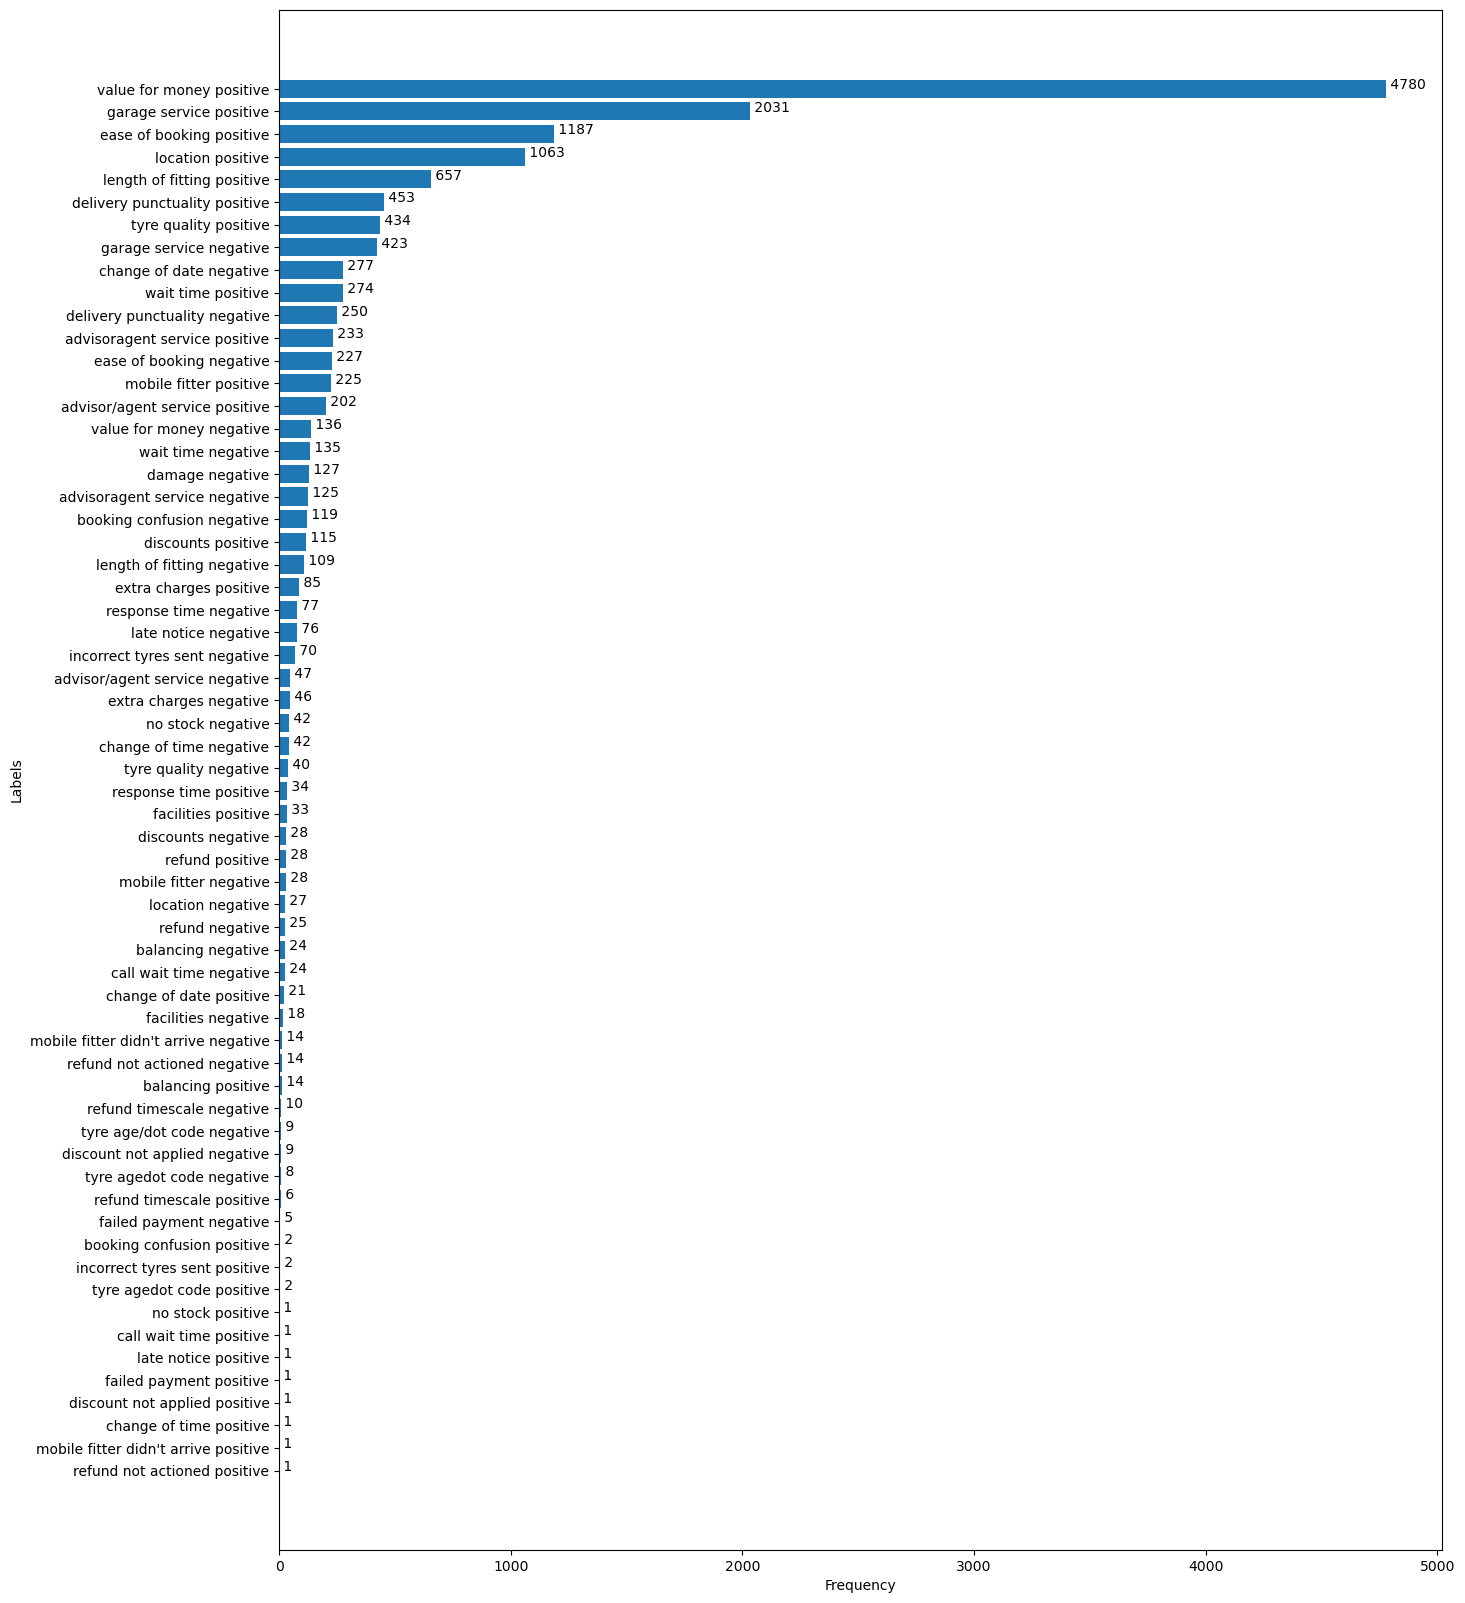

In [11]:
# Count each labels

d = dict(Counter(df.target.explode()))
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
plt.figure(figsize=(15,20))
plt.barh(range(len(d)), d.values(), align='center')
plt.yticks(range(len(d)), d.keys())
plt.xlabel('Frequency')
plt.ylabel('Labels')

for index, value in enumerate(d.values()):
    plt.text(value, index, ' '+str(value))

plt.show()

In [12]:
#As per the above graph we can see that there are labels having less than 100 frequency

#Lets combine them to their respective labels

In [13]:
def replace_label(df, src, trg):
    def replace(texts):
        return [lab if lab != src else trg for lab in texts]
    
    df['target'] = df['target'].map(replace)
    


In [14]:
def combine_labels(df,min_samples = 100):
    label_counts = df.target.explode().value_counts()
    label_names = label_counts.index
    
    fewer_labels = []
    for i,label in enumerate(label_names):
        if label_counts[i] < min_samples:
            fewer_labels.append(label)
    
    def replace_fewer(labels):
        fewers = []
        for label in labels:
            sentiment = label.split(' ')[-1]
            if label in fewer_labels:
                fewers.append(' '.join(['extra',sentiment]))
            else:
                fewers.append(label)
                
        return fewers 
    
    df['target'] = df['target'].map(replace_fewer)  

    return df

replace_label(df, 'advisor/agent service positive','advisoragent service positive')
replace_label(df, 'advisor/agent service negative','advisoragent service negative')
replace_label(df, 'tyre age/dot code negative','tyre agedot code negative')

df = combine_labels(df)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\3339471413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map(replace)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\2919606833.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map(replace_fewer)


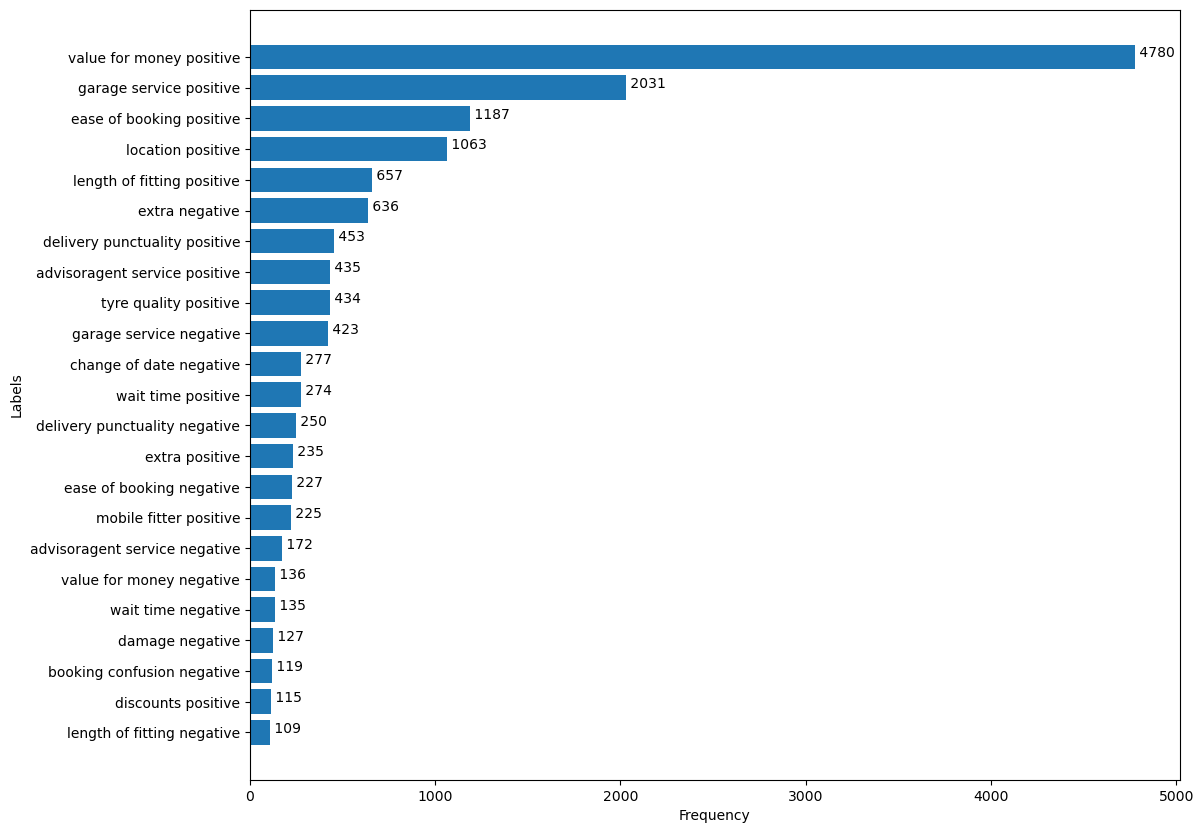

In [15]:
#After combining labels
d = dict(Counter(df.target.explode()))
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
plt.figure(figsize=(12,10))
plt.barh(range(len(d)), d.values(), align='center')
plt.yticks(range(len(d)), d.keys())
plt.xlabel('Frequency')
plt.ylabel('Labels')

for index, value in enumerate(d.values()):
    plt.text(value, index, ' '+str(value))

plt.show()

## Sentiment Analysis

In [16]:
example = df['text'][43]
example

'Easy to order all ready when I got there fitted quickly with no issues at a good price'

In [17]:
tokens = nltk.word_tokenize(example)
tokens

['Easy',
 'to',
 'order',
 'all',
 'ready',
 'when',
 'I',
 'got',
 'there',
 'fitted',
 'quickly',
 'with',
 'no',
 'issues',
 'at',
 'a',
 'good',
 'price']

### We will use NLTK's SentimentIntensityAnalyzer to get neg/neu/pos score of the text

In [18]:
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Run the polarity score on example
sia.polarity_scores(example)

{'neg': 0.098, 'neu': 0.533, 'pos': 0.369, 'compound': 0.7269}

In [20]:
df = df.reset_index().rename(columns={'index':'Id'})
df

,Id,text,target,target_counts
0,0,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...",2
1,1,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...",2
2,2,Very easy to use and good value for money.,[value for money positive],1
3,3,Really easy and convenient to arrange,[ease of booking positive],1
4,4,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...",3
...,...,...,...,...
8120,10125,"Never had any issues with the tyres, fitting o...","[tyre quality positive, garage service positive]",2
8121,10126,so easy to order the tyre and choice the garag...,[ease of booking positive],1
8122,10127,"I ordered the wrong tyres, however [REDACTED] ...","[extra positive, delivery punctuality positive...",3
8123,10128,"Good experience, first time I have used [REDAC...",[length of fitting positive],1


In [21]:
# Lets run plarity score on the entire data
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/8125 [00:00<?, ?it/s]

In [22]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
0,0.000,0.909,0.091,0.5106
1,0.000,0.458,0.542,0.8074
2,0.000,0.414,0.586,0.8173
3,0.000,0.610,0.390,0.4927
4,0.000,0.720,0.280,0.6642
...,...,...,...,...
10125,0.000,0.739,0.261,0.7184
10126,0.000,0.814,0.186,0.4927
10127,0.092,0.742,0.166,0.3612
10128,0.000,0.681,0.319,0.8930


In [23]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how = 'left')


In [25]:
# now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,text,target,target_counts
0,0,0.0,0.909,0.091,0.5106,Tires where delivered to the garage of my choi...,"[garage service positive, ease of booking posi...",2
1,1,0.0,0.458,0.542,0.8074,"Easy Tyre Selection Process, Competitive Prici...","[garage service positive, value for money posi...",2
2,2,0.0,0.414,0.586,0.8173,Very easy to use and good value for money.,[value for money positive],1
3,3,0.0,0.610,0.390,0.4927,Really easy and convenient to arrange,[ease of booking positive],1
4,4,0.0,0.720,0.280,0.6642,It was so easy to select tyre sizes and arrang...,"[location positive, value for money positive, ...",3


Here we have calculated the sentiment from the text

wheather the text is positive/negative/neutral